In [1]:
!wget https://github.com/annashell/linear_models/raw/5d98b5b23582db5e3ce41729ae948ae88404d232/violin_original.wav
!wget https://github.com/annashell/linear_models/raw/5d98b5b23582db5e3ce41729ae948ae88404d232/gunshot.wav
!wget https://github.com/annashell/linear_models/raw/refs/heads/main/cta0001.wav

--2025-03-09 14:28:08--  https://github.com/annashell/linear_models/raw/5d98b5b23582db5e3ce41729ae948ae88404d232/violin_original.wav
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/annashell/linear_models/5d98b5b23582db5e3ce41729ae948ae88404d232/violin_original.wav [following]
--2025-03-09 14:28:08--  https://raw.githubusercontent.com/annashell/linear_models/5d98b5b23582db5e3ce41729ae948ae88404d232/violin_original.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 441044 (431K) [audio/wav]
Saving to: ‘violin_original.wav’

violin_original.wav 100%[===================>] 430.71K  --.-KB/s    in 0

In [2]:
from IPython.display import Audio

Audio('gunshot.wav')

In [3]:
Audio('violin_original.wav')

In [4]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np

fs_shot, data_shot = wavfile.read('gunshot.wav')
start_time_shot = 0.12
start_sample_shot = int(start_time_shot * fs_shot)

y_shot = data_shot[start_sample_shot:][:, 0] # стерео сигнал, берем только левый канал

# нормируем сигнал
norm = max(np.abs(y_shot))
y_shot_normalized = y_shot/norm

x_shot = np.linspace(0.0, len(y_shot) / fs_shot, len(y_shot), endpoint=False)

<ipython-input-4-cd6c39b01327>:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs_shot, data_shot = wavfile.read('gunshot.wav')


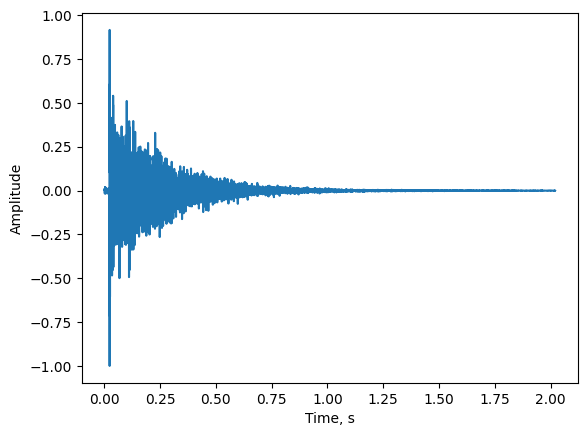

In [5]:
plt.plot(x_shot, y_shot_normalized)
plt.xlabel("Time, s")
plt.ylabel("Amplitude")
plt.show()

In [6]:
from scipy.fft import rfft, rfftfreq

T_shot = 1.0 / fs_shot
N_shot = len(y_shot)

# спектр сигнала выстрела
yf_shot = rfft(y_shot_normalized)
xf_shot = rfftfreq(N_shot, T_shot)

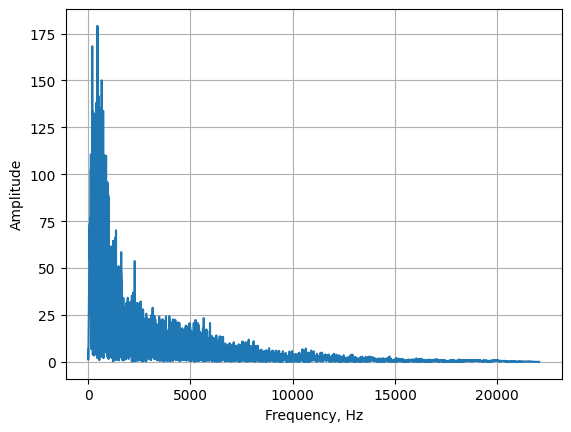

In [7]:
plt.plot(xf_shot, np.abs(yf_shot))
plt.xlabel("Frequency, Hz")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

In [8]:
fs_violin, data_violin = wavfile.read('violin_original.wav')
start_time = 0.11
start_sample = int(start_time * fs_violin)

y_violin = data_violin[start_sample:]

# нормируем сигнал
norm = max(np.abs(y_violin))
y_violin_normalized = y_violin/norm

x_violin = np.linspace(0.0, len(y_violin) / fs_violin, len(y_violin), endpoint=False)

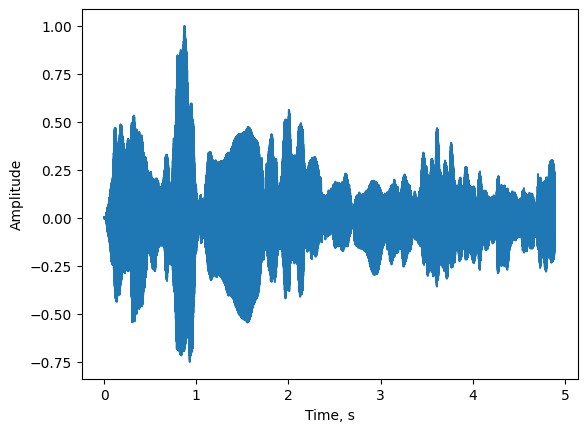

In [9]:
plt.plot(x_violin, y_violin_normalized)
plt.xlabel("Time, s")
plt.ylabel("Amplitude")
plt.show()

In [10]:
T_v = 1.0 / fs_violin
N_v = len(y_violin)

# спектр сигнала скрипки
yf_v = rfft(y_violin_normalized)
xf_v = rfftfreq(N_v, T_v)

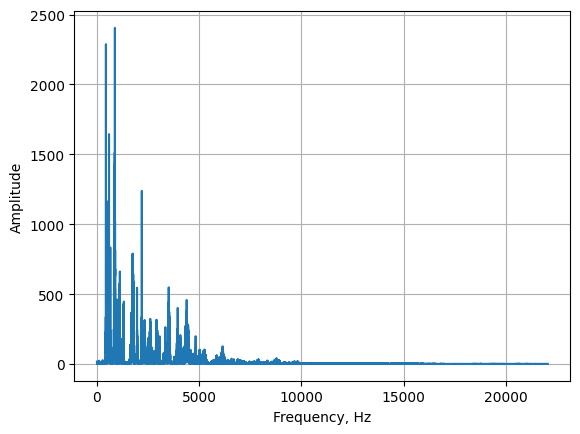

In [11]:
plt.plot(xf_v, np.abs(yf_v))
plt.xlabel("Frequency, Hz")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

In [12]:
# дополняем нулями сигнал выстрела до длины сигнала скрипки

diff_len_signals = len(y_violin_normalized) - len(y_shot_normalized)

y_shot_normalized = np.concatenate((y_shot_normalized, np.zeros(diff_len_signals)))

In [13]:
from scipy.fft import fft, ifft

# ДПФ обоих сигналов
yf_shot = fft(y_shot_normalized)
yf_violin = fft(y_violin_normalized)

In [14]:
# по теореме о свертке, ищем свертку как ОДПФ произведения ДПФ сигналов; берем действительную часть
result = ifft(yf_violin * yf_shot).real

# приводим к максимальной амплитуде 32000
norm = max(np.abs(result))
result_normalized = result/norm
result = result_normalized * 32000

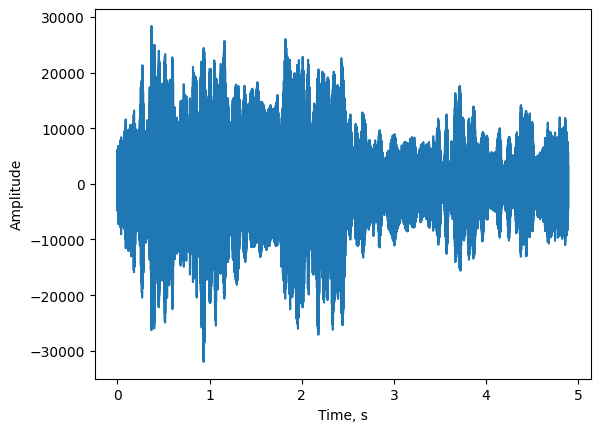

In [15]:
plt.plot(x_violin, result)
plt.xlabel("Time, s")
plt.ylabel("Amplitude")
plt.show()

In [16]:
wavfile.write("result.wav", fs_violin, result.astype(np.int16))

In [17]:
Audio('result.wav')

In [18]:
# сделаем то же самое для речевого сигнала

fs_cta, y_cta = wavfile.read('cta0001.wav')

norm = max(np.abs(y_cta))
y_cta_normalized = y_cta / norm

x_cta = np.linspace(0.0, len(y_cta) / fs_cta, len(y_cta), endpoint=False)

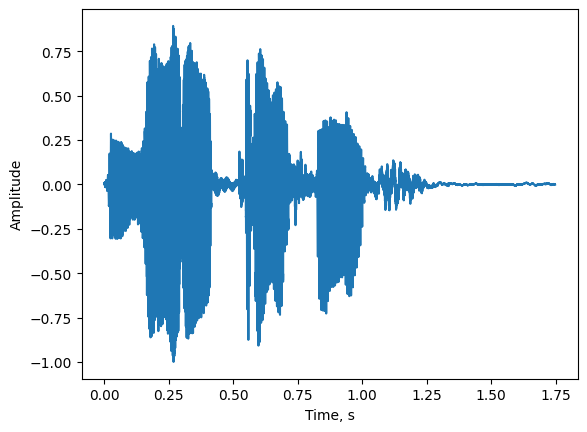

In [19]:
plt.plot(x_cta, y_cta_normalized)
plt.xlabel("Time, s")
plt.ylabel("Amplitude")
plt.show()

In [20]:
diff_len_signals = len(y_cta_normalized) - len(y_shot_normalized)

diff_len_signals

-177114

In [21]:
# речевой сигнал оказался короче сигнала выстрела, так что обрезаем сигнал выстрела

y_shot_normalized = y_shot_normalized[:len(y_cta_normalized)]
print(len(y_cta_normalized), len(y_shot_normalized))

38535 38535


In [22]:
yf_shot = fft(y_shot_normalized)
yf_cta = fft(y_cta_normalized)

In [23]:
result_cta = ifft(yf_cta * yf_shot).real

norm = max(np.abs(result_cta))
result_cta_normalized = result_cta/norm
result_cta = result_cta_normalized * 32000

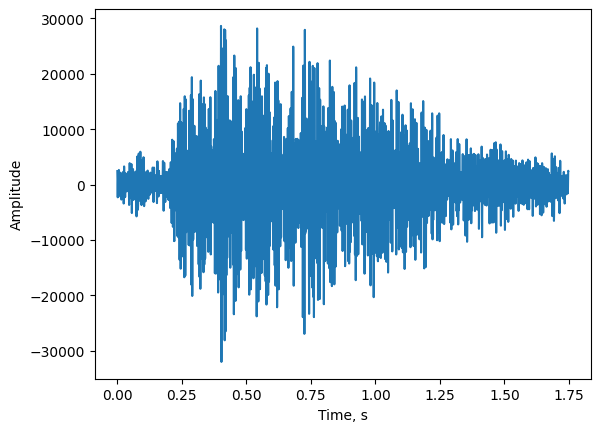

In [24]:
plt.plot(x_cta, result_cta)
plt.xlabel("Time, s")
plt.ylabel("Amplitude")
plt.show()

In [25]:
wavfile.write("result_cta.wav", fs_cta, result_cta.astype(np.int16))

In [26]:
Audio('result_cta.wav')